<a href="https://colab.research.google.com/github/Telephos/FeatureMatching/blob/main/FeatureMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing some libraries here.

In [ ]:
!pip install opencv-contrib-python
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
import imutils

Connecting to google drive directory.



In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


Moving to directory where files are stored.

In [ ]:
cd /content/MyDrive/MyDrive/Colab\ Notebooks

/content/MyDrive/MyDrive/Colab Notebooks


Loading images below.

In [ ]:
blocks_im = cv2.imread("blocks.png",-1)
table_im = cv2.imread("table.jpg")

Rotating the block image counter-clockwise by 33 degrees.
Showing resultant image after rotation.


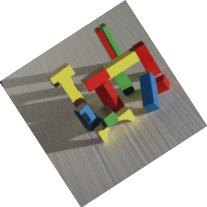

(207, 207, 4)


In [ ]:
blocks_imRot = imutils.rotate_bound(blocks_im, -33)
cv2_imshow(blocks_imRot)

#Pulling image size to use later
block_size = blocks_imRot.shape
print(block_size)

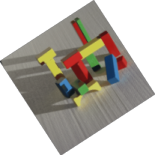

In [ ]:
#Reducing the picture to 3/4 of it's original size. 
blocks_imRot = imutils.resize(blocks_imRot, width=(round(block_size[0]*.75)))
cv2_imshow(blocks_imRot)

https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv

Overlying blocks image on image of a table.

In [ ]:
x_offset=y_offset=200
y1, y2 = y_offset, y_offset + blocks_imRot.shape[0]
x1, x2 = x_offset, x_offset + blocks_imRot.shape[1]

alpha_s = blocks_imRot[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    table_im[y1:y2, x1:x2, c] = (alpha_s * blocks_imRot[:, :, c] +
                              alpha_l * table_im[y1:y2, x1:x2, c])

Showing resultant image

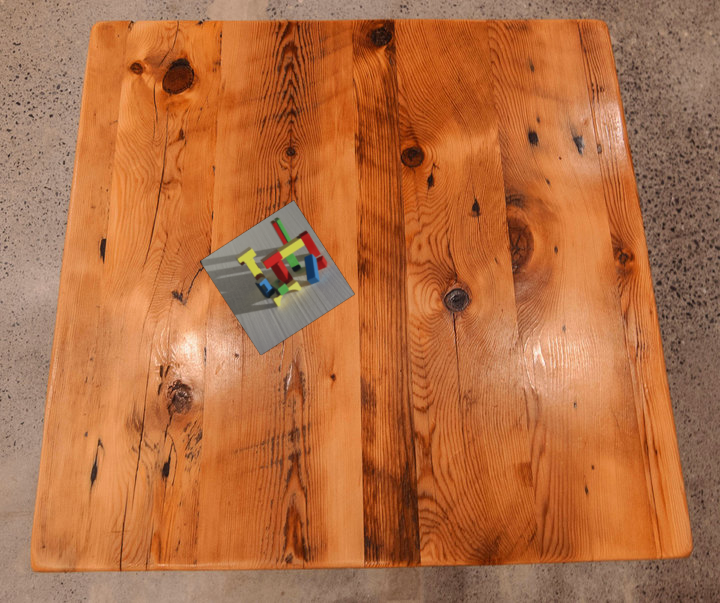

In [ ]:
cv2_imshow(table_im)

In [ ]:
print(table_im.shape)

(603, 720, 3)


In [ ]:
gray_blocks = cv2.cvtColor(blocks_im, cv2.COLOR_BGR2GRAY)
gray_table = cv2.cvtColor(table_im, cv2.COLOR_BGR2GRAY)

https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

In [ ]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray_blocks, None)
kp2, des2 = sift.detectAndCompute(gray_table, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
  if m.distance < 0.75*n.distance:
    good.append([m])
    
img3 = cv2.drawMatchesKnn(gray_blocks,kp1,gray_table,kp2,good,None,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

In [ ]:
print(des1[0])

[ 17.   0.   0.   5.  33.  16.   5.   7. 163.   2.   0.   3.  18.   3.
   3.  60.  49.   2.   1.  32. 163.   7.   1.  12.   0.   0.   0.   8.
  73.  18.   1.   0.  41.   1.   1.  11.  31.   1.   0.   4. 163.   6.
   1.   9.  40.   1.   0.  43.  45.   2.   0.  60. 163.   3.   0.   8.
   0.   0.   1.  22.  82.   7.   1.   0.  46.   8.   1.   7.  33.   4.
   0.   1. 163.  63.   6.  29.  35.   0.   0.   2.  22.  14.   6. 116.
 163.   1.   0.   0.   0.   0.   7.  18.  42.  13.   2.   0.  20.   8.
   1.  12.  17.   6.  12.   3. 108.  69.   9.  24.  19.   1.   2.   2.
   6.  12.   7.  73. 136.  10.   3.   0.   0.   0.   5.   9.  15.  14.
   4.   0.]


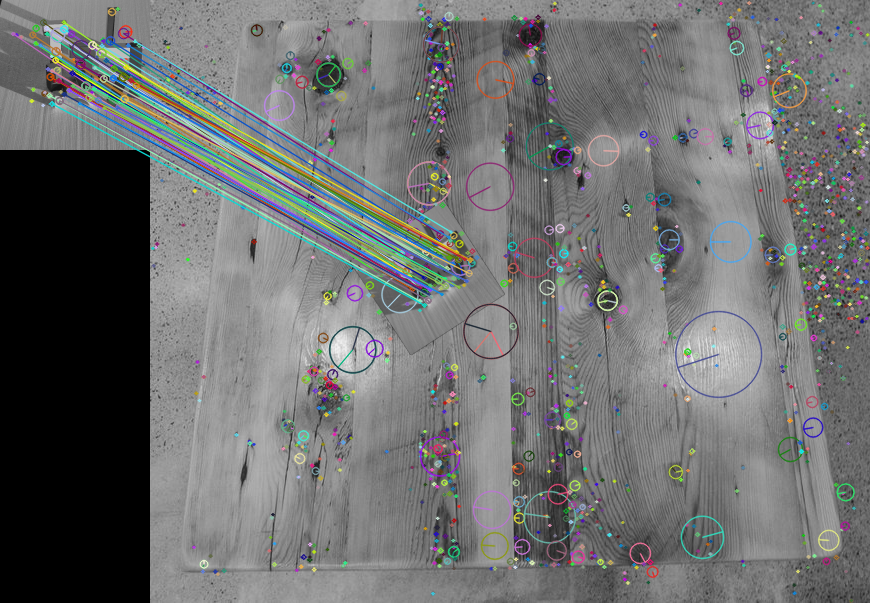

In [ ]:
cv2_imshow(img3)

In [ ]:
points1 = cv2.KeyPoint.convert(kp1)

In [ ]:
points1

array([[ 12.952295,  33.437946],
       [ 12.952295,  33.437946],
       [ 15.933758,  34.616768],
       [ 15.933758,  34.616768],
       [ 20.83739 ,  36.681084],
       [ 20.83739 ,  36.681084],
       [ 31.406204, 100.48978 ],
       [ 32.280113,  34.42891 ],
       [ 32.871975,  89.07017 ],
       [ 32.871975,  89.07017 ],
       [ 35.267708,  42.874596],
       [ 35.267708,  42.874596],
       [ 35.632187,  27.818865],
       [ 39.950985,  44.911636],
       [ 39.950985,  44.911636],
       [ 42.776714, 104.83008 ],
       [ 42.927876,  22.04783 ],
       [ 44.095108,  93.056435],
       [ 44.528534,  91.711914],
       [ 46.48491 ,  27.867977],
       [ 46.63552 ,  33.414204],
       [ 47.718616,  68.70593 ],
       [ 48.934647,  51.958702],
       [ 49.005283,  95.03902 ],
       [ 50.027325,  76.44801 ],
       [ 50.027325,  76.44801 ],
       [ 51.51368 ,  55.83323 ],
       [ 51.53918 ,  70.30963 ],
       [ 51.53918 ,  70.30963 ],
       [ 51.618553, 103.28896 ],
       [ 5